<a href="https://colab.research.google.com/github/FelicianoRobles/FisicaComputacional1/blob/master/Actividad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1 (Datos de Actividad 3)

In [8]:
#Se importan los paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/FelicianoRobles/FisicaComputacional1/master/Actividad3/3005.txt' # URL de inf raw
 
my_cols = ['Fecha', 'Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)'] # Nombre a columnas
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python') # Leer

df_w1 = df_dist.copy() # Se hace una copia del dataframe

str_Nulo = 'Nulo'
df_w2 = df_w1.replace(to_replace=str_Nulo, value='', regex=True) # Reemplazar Nulo por un espacio en blanco

cols_list = ['Precip(MM)', 'Evap(MM)', 'Tmax(°C)', 'Tmin(°C)']
for cols in cols_list:
  df_w2[cols] = pd.to_numeric(df_w2[cols], errors='coerce') # Se convierten a números flotantes 
#df_w2.info()

# De la instrucción anterior, vemos que hay valores faltantes. Sumamos los valores nulos. 
df_w2.isnull().sum()

# Un análisis estadístico breve de las variables numéricas redondeado a 2 cifras significativas
df_w2.describe().round(2)

df_w3 = df_w2.copy() # Se hace una copia del dataframe

df_w3['Fecha']=pd.to_datetime(df_w3['Fecha'], dayfirst=True).copy() # Primer dato que sea dia
df_w3['Año'] = df_w3['Fecha'].dt.year # Columna de año
df_w3['Mes'] = df_w3['Fecha'].dt.month # Columna de mes
#df_w3.dtypes # Verificar tipos

df_meteo = df_w3.copy() # Archico con que trabajar actividad 4
df_meteo.info()
print(df_meteo.head())
print(df_meteo.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25851 entries, 0 to 25850
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Fecha       25851 non-null  datetime64[ns]
 1   Precip(MM)  25828 non-null  float64       
 2   Evap(MM)    6113 non-null   float64       
 3   Tmax(°C)    24972 non-null  float64       
 4   Tmin(°C)    24963 non-null  float64       
 5   Año         25851 non-null  int64         
 6   Mes         25851 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 1.4 MB
       Fecha  Precip(MM)  Evap(MM)  Tmax(°C)  Tmin(°C)   Año  Mes
0 1937-06-01         0.0       NaN      33.0      11.0  1937    6
1 1937-06-02         0.0       NaN      33.0      11.0  1937    6
2 1937-06-03         0.0       NaN      33.0      11.0  1937    6
3 1937-06-04         0.0       NaN      32.0      11.0  1937    6
4 1937-06-05         0.0       NaN      33.0      12.0  1937 

# Parte 2 (Crear histogramas)


## Precipitación (Histograma con Seaborn)
Se utiliza la escala logaritmica para apreciar mejor los datos

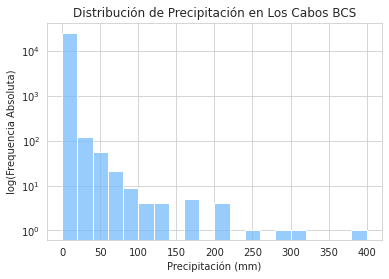

In [10]:
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Los Cabos BCS')
sns.histplot(data=df_meteo, x='Precip(MM)',color='xkcd:sky blue',bins=20, log_scale=(False,True)); # Grafica de precipitacion a escala

## Evaporación (Histograma con Seaborn)
Se utiliza la escala logaritmica para apreciar mejor los datos

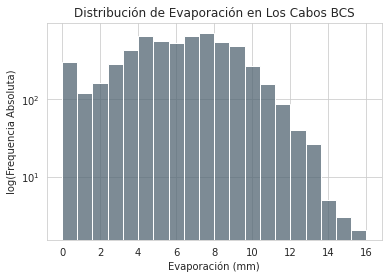

In [12]:
sns.set_style("whitegrid")
plt.xlabel('Evaporación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Evaporación en Los Cabos BCS')
sns.histplot(data=df_meteo, x='Evap(MM)',color='xkcd:slate',bins=20, log_scale=(False,True)); # Grafica de evaporacion a escala

## Temperaturas máximas (Histograma con Seaborn)
Se utiliza la escala logaritmica para apreciar mejor los datos

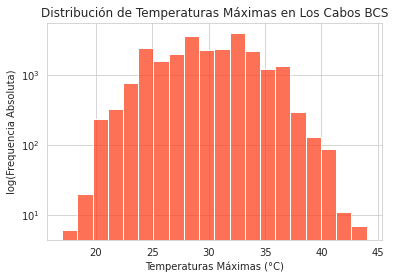

In [15]:
sns.set_style("whitegrid")
plt.xlabel('Temperaturas Máximas (°C)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Temperaturas Máximas en Los Cabos BCS')
sns.histplot(data=df_meteo, x='Tmax(°C)',color='xkcd:orange red',bins=20, log_scale=(False,True)); # Grafica de Tmax a escala

## Temperaturas minimas (Histograma con Seaborn)
Se utiliza la escala logaritmica para apreciar mejor los datos

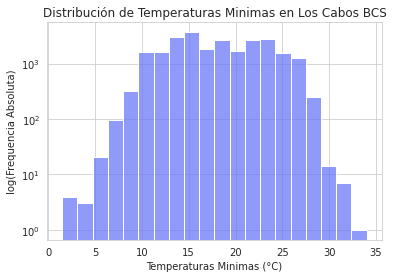

In [16]:
sns.set_style("whitegrid")
plt.xlabel('Temperaturas Minimas (°C)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Temperaturas Minimas en Los Cabos BCS')
sns.histplot(data=df_meteo, x='Tmin(°C)',color='xkcd:cornflower',bins=20, log_scale=(False,True)); # Grafica de Tmin a escala

# Parte 3 (Grafica de cajas)

## Evaporacion

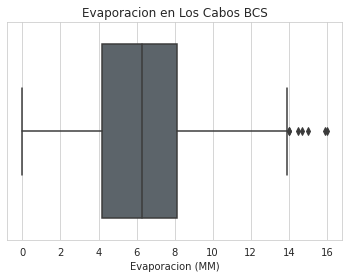

In [29]:
# Gráfica de Cajas de evaporacion
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo['Evap(MM)'],color='xkcd:slate grey', data=df_meteo, orient='h').set(xlabel='Evaporacion (MM)', title='Evaporacion en Los Cabos BCS');

## Temperaturas Máxima

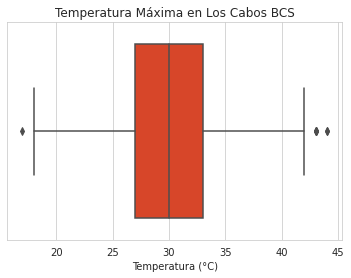

In [32]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo['Tmax(°C)'],color='xkcd:vermillion', data=df_meteo, orient='h').set(xlabel='Temperatura (°C)',title='Temperatura Máxima en Los Cabos BCS');

## Temperatura Minima

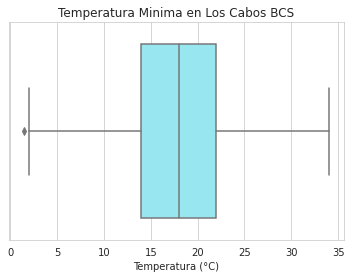

In [38]:
sns.set_style("whitegrid")

sns.boxplot(x=df_meteo['Tmin(°C)'],color='xkcd:robin egg blue', data=df_meteo, orient='h').set(xlabel='Temperatura (°C)',title='Temperatura Minima en Los Cabos BCS');

# Parte 4 (Graficas de barras)

## Por Años

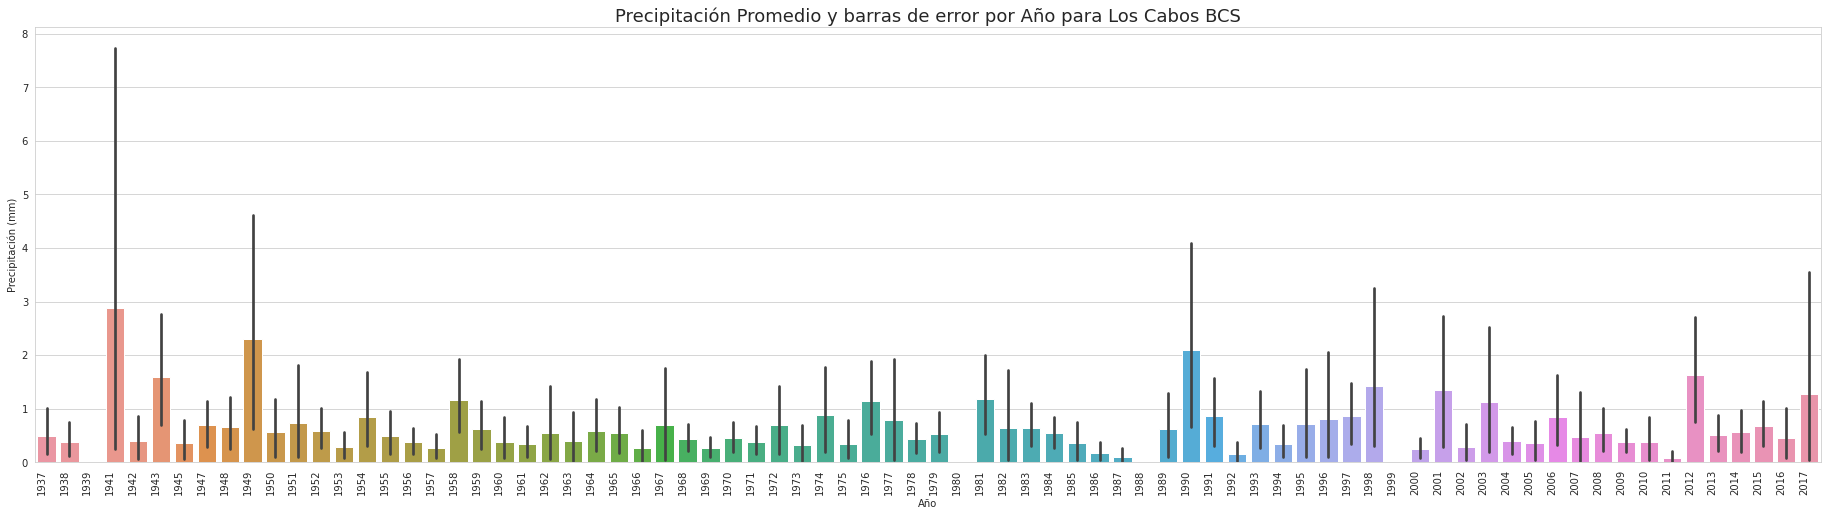

In [44]:
sns.set_style('whitegrid')
plt.figure(figsize=(32,8))

g=sns.barplot(x='Año', y='Precip(MM)', data=df_meteo); 

g.set_xticklabels(g.get_xticklabels(), rotation=90, horizontalalignment='right'); # Gráfica de Precipitación últimos 30 años y rotamos 90° los Años en el eje x para mejor lectura

plt.xlabel('Año')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error por Año para Los Cabos BCS', fontsize=18)

plt.show()

## Por Mes


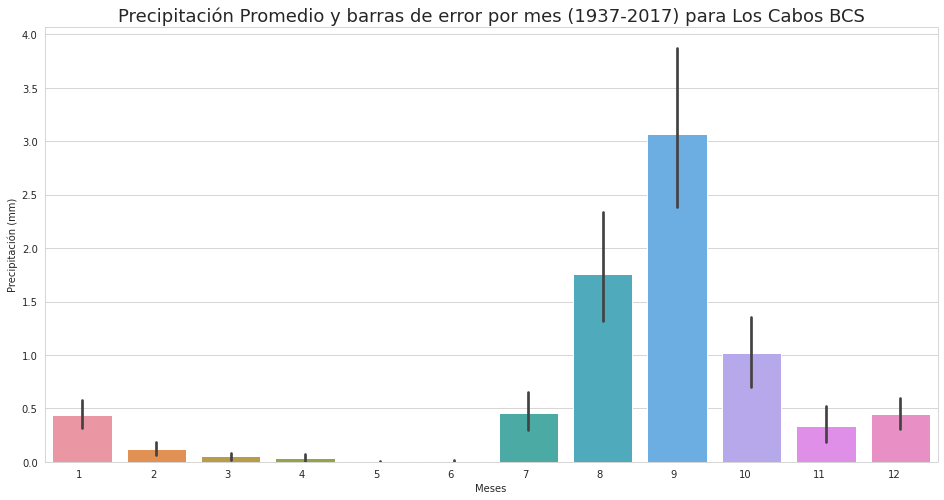

In [46]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Mes', y='Precip(MM)', data=df_meteo); 

g.set_xticklabels(g.get_xticklabels(), horizontalalignment='right'); # Gráfica de Precipitación últimos 30 años

plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error por mes (1937-2017) para Los Cabos BCS', fontsize=18)

plt.show()

# Parte 5 (Ultimos 30 años)

## Seleccionaremos un conjunto de años de los ultimos 30 años

In [47]:
df_30 = df_meteo[(df_meteo['Año'] >= 1987) & (df_meteo['Año'] < 2017)]

## Precipitación (lineplot)

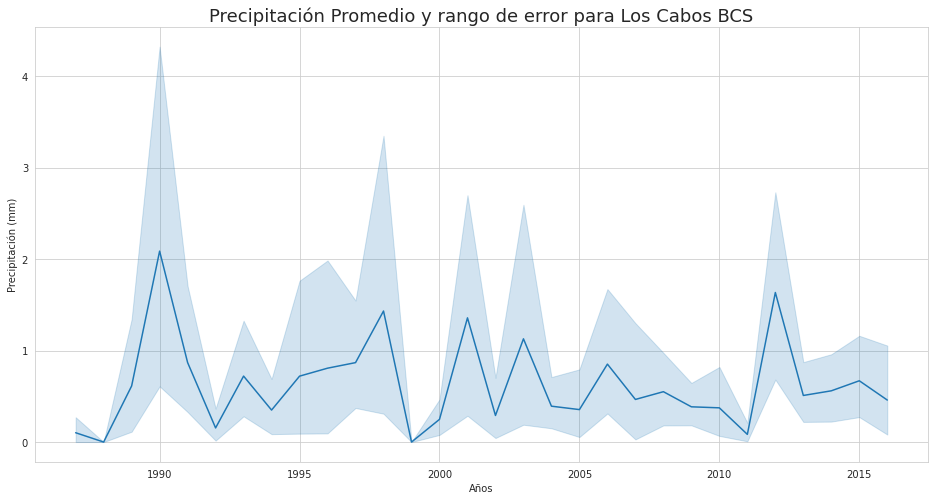

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Precip(MM)', data=df_30); # Gráfica de Precipitación últimos 30 años

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Los Cabos BCS', fontsize=18)

plt.show()

## Temperaturas Maxima (lineplot)

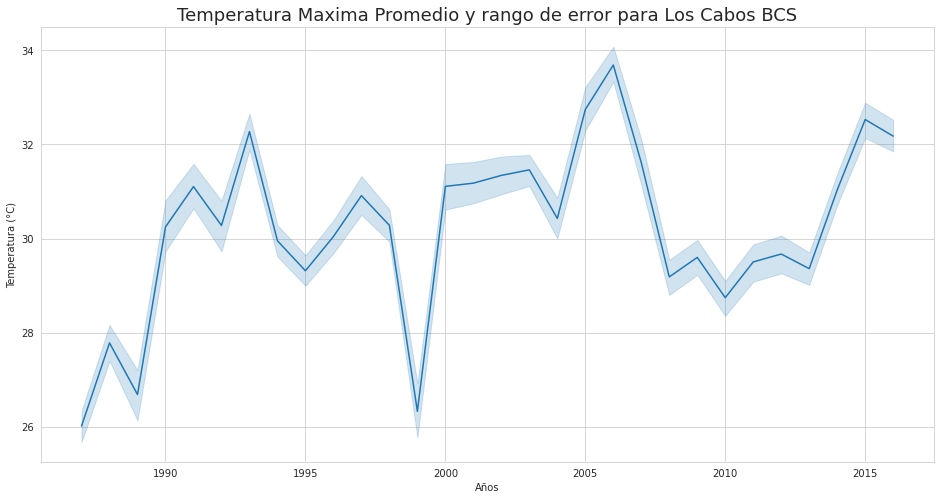

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Tmax(°C)', data=df_30); # Gráfica de Temperatura maxima de los últimos 30 años

plt.xlabel('Años')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Maxima Promedio y rango de error para Los Cabos BCS', fontsize=18)

plt.show()

## Temperaturas Minima (lineplot)

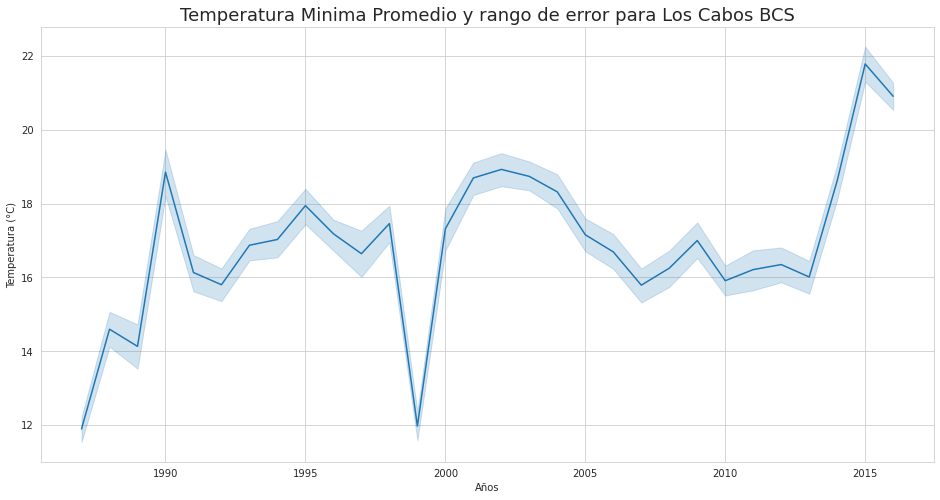

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.lineplot(x='Año', y='Tmin(°C)', data=df_30); # Gráfica de Temperatura minima de los últimos 30 años

plt.xlabel('Años')
plt.ylabel('Temperatura (°C)')
plt.title('Temperatura Minima Promedio y rango de error para Los Cabos BCS', fontsize=18)

plt.show()

# Parte 6 (Diagramas de cajas por mes de los ultimos 30 años)


## Temperaturas Maxima

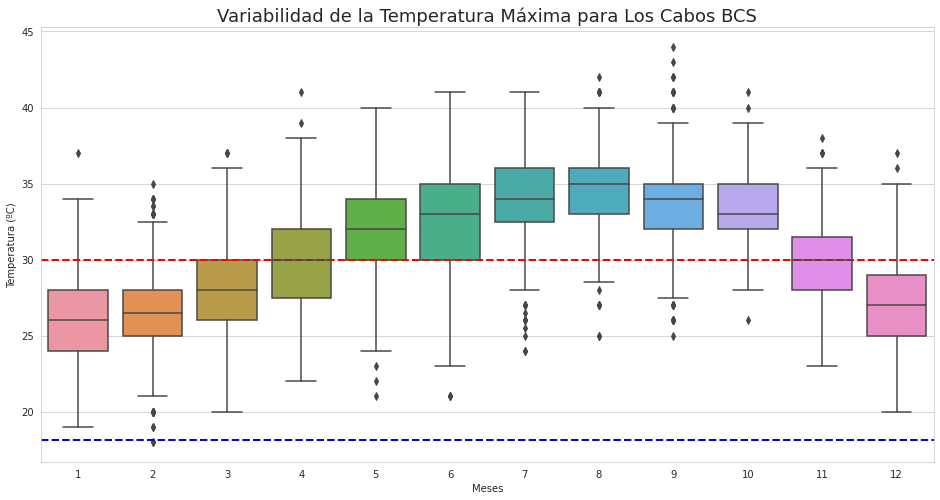

mean(Tmax) =  29.948021784398527
mean(Tmin) =  18.12598245403197
Diff Tmax_ave-Tmin_ave =  11.822039330366557


In [69]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

Tmax_ave = df_meteo['Tmax(°C)'].mean() # Promedio de Tmax
Tmin_ave = df_meteo['Tmin(°C)'].mean() # Promedio de Tmin

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax(°C)', data=df_30);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Los Cabos BCS', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

## Temperaturas Minima

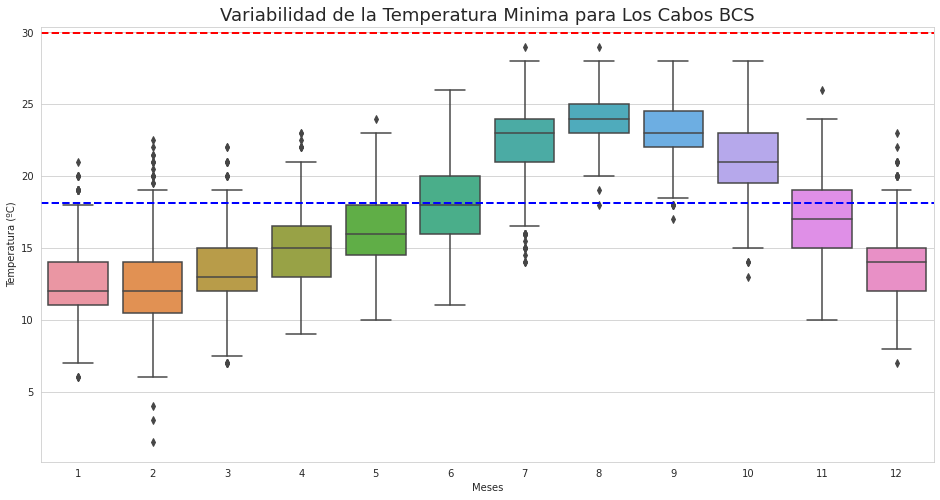

mean(Tmax) =  29.948021784398527
mean(Tmin) =  18.12598245403197
Diff Tmax_ave-Tmin_ave =  11.822039330366557


In [51]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteo['Tmax(°C)'].mean()
Tmin_ave = df_meteo['Tmin(°C)'].mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin(°C)', data=df_30);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Minima para Los Cabos BCS', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

## Evaporacion

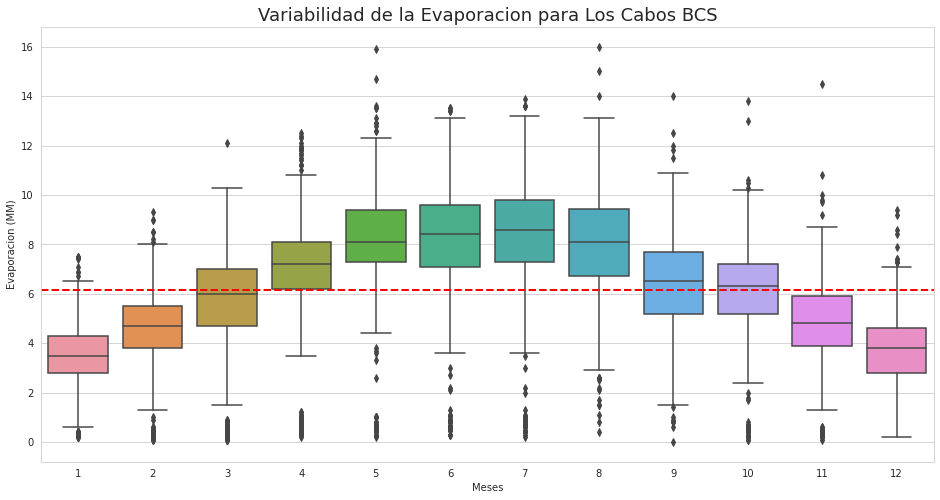

El promedio de las evaporaciones es ≈ 6.1549811876328855 (MM)


In [68]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

Evap_ave = df_meteo['Evap(MM)'].mean() # Promedio de Evaporacion

g=sns.boxplot(x='Mes', y='Evap(MM)', data=df_30); # Gráfica de cajas de la Evaporacion

plt.axhline(Evap_ave, color = 'r', linestyle='--', linewidth=2); # Linea de Evaporacion promedio 

plt.xlabel('Meses')
plt.ylabel('Evaporacion (MM)')
plt.title('Variabilidad de la Evaporacion para Los Cabos BCS', fontsize=18)

plt.show()

print(f'El promedio de las evaporaciones es \u2248',Evap_ave,'(MM)') # Imprimir promedio de las Evaporaciones